<a href="https://colab.research.google.com/github/RamcharanChandragiri/MACHINE-LEARNING/blob/main/ML_Lab_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SUBTASK-01**

Bootstrap Application: Applying Bootstrap method to estimate confidence
intervals for a model parameter -e.g., regression coefficient.

Kaggle Dataset Link: https://www.kaggle.com/competitions/house-prices-advanced-
regression-techniques?

Tasks:
1. Load train.csv and select:
Feature: GrLivArea
Target: SalePrice
2. Fit a Linear Regression model and obtain coefficient β₁.
3. Apply Bootstrap resampling (B=1000 samples) to estimate distribution of β₁.
4. Compute 95% confidence interval for β₁ using:
Percentile method
5. Plot histogram of bootstrapped β₁ values.


Original β₁ (Slope): 107.1303589658252
95% Confidence Interval for β₁:
Lower Bound: 93.62472822688602
Upper Bound: 120.68692742158524


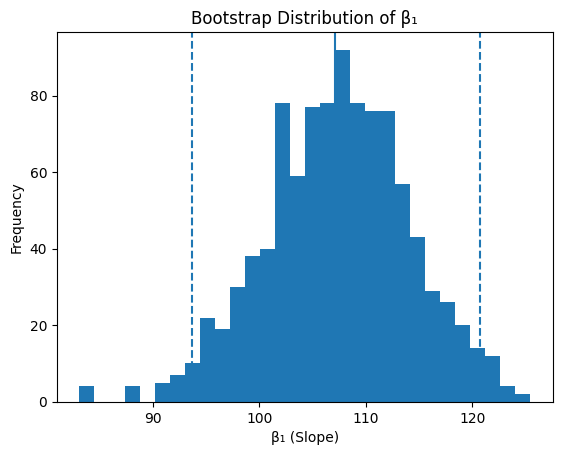

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1️. Load dataset
data = pd.read_csv("housetrain.csv")

# 2️. Select feature and target
X = data[['GrLivArea']].values
y = data['SalePrice'].values

# 3️. Fit original Linear Regression model
model = LinearRegression()
model.fit(X, y)
beta_1_original = model.coef_[0]

print("Original β₁ (Slope):", beta_1_original)

# 4️. Bootstrap Resampling
B = 1000
boot_betas = []

n = len(data)

for i in range(B):
    # Sample with replacement
    indices = np.random.choice(n, n, replace=True)
    X_sample = X[indices]
    y_sample = y[indices]

    # Fit model
    model_boot = LinearRegression()
    model_boot.fit(X_sample, y_sample)

    boot_betas.append(model_boot.coef_[0])

boot_betas = np.array(boot_betas)

# 5️. 95% Confidence Interval (Percentile Method)
lower = np.percentile(boot_betas, 2.5)
upper = np.percentile(boot_betas, 97.5)

print("95% Confidence Interval for β₁:")
print("Lower Bound:", lower)
print("Upper Bound:", upper)

# 6️. Plot histogram
plt.hist(boot_betas, bins=30)
plt.axvline(lower, linestyle='--')
plt.axvline(upper, linestyle='--')
plt.axvline(beta_1_original)
plt.title("Bootstrap Distribution of β₁")
plt.xlabel("β₁ (Slope)")
plt.ylabel("Frequency")
plt.show()

**SUBTASK-02**

Bootstrap Application: Applying Bootstrap method to estimate confidence
intervals for a model parameter -e.g., regression coefficient
Kaggle Dataset Link: https://www.kaggle.com/datasets/mirichoi0218/insurance?

Tasks:
1. Load dataset and encode categorical variables.
2. Use:
Feature: bmi
Target: charges
3. Train Linear Regression and find coefficient for BMI.
4. Perform bootstrap (B=2000) to estimate 95% CI for BMI coefficient.
5. Interpret whether BMI significantly affects insurance charges.


Original BMI Coefficient (β): 393.87303079739524
95% Confidence Interval for BMI coefficient:
Lower Bound: 279.53754633836644
Upper Bound: 513.6070853576571


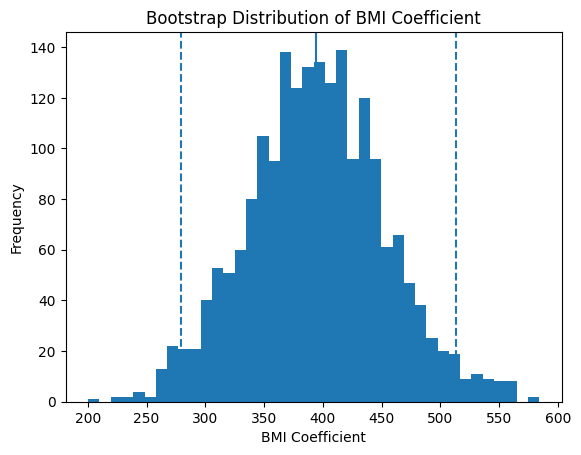

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

# 1️. Load dataset
data = pd.read_csv("insurance.csv")

# Encode categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# 2️. Define Feature and Target
X = data_encoded[['bmi']]
y = data_encoded['charges']

# 3️. Train Linear Regression
model = LinearRegression()
model.fit(X, y)

beta_bmi_original = model.coef_[0]
print("Original BMI Coefficient (β):", beta_bmi_original)

# 4️. Bootstrap (B = 2000)
B = 2000
n = len(data_encoded)
boot_betas = []

for i in range(B):
    indices = np.random.choice(n, n, replace=True)
    X_sample = X.iloc[indices]
    y_sample = y.iloc[indices]

    model_boot = LinearRegression()
    model_boot.fit(X_sample, y_sample)

    boot_betas.append(model_boot.coef_[0])

boot_betas = np.array(boot_betas)

# 5️. 95% CI (Percentile Method)
lower = np.percentile(boot_betas, 2.5)
upper = np.percentile(boot_betas, 97.5)

print("95% Confidence Interval for BMI coefficient:")
print("Lower Bound:", lower)
print("Upper Bound:", upper)

# Plot histogram
plt.hist(boot_betas, bins=40)
plt.axvline(lower, linestyle='--')
plt.axvline(upper, linestyle='--')
plt.axvline(beta_bmi_original)
plt.title("Bootstrap Distribution of BMI Coefficient")
plt.xlabel("BMI Coefficient")
plt.ylabel("Frequency")
plt.show()

**SUBTASK-03**

Bootstrap Application: Applying Bootstrap method to estimate confidence
intervals for a model parameter -e.g., regression coefficient

Kaggle Dataset Link: https://www.kaggle.com/datasets/yasserh/advertising-sales-dataset?

Tasks:
1. Load dataset and use:
Feature: TV
Target: Sales
2. Fit Linear Regression and compute slope (β₁).
3. Apply Bootstrap (B=1000) and compute:
Mean of β₁
Standard deviation of β₁
95% CI of β₁
4. Plot bootstrap distribution of β₁.
5. Compare bootstrap CI with analytical CI


Original β₁ (Slope): 0.04753664043301975

Bootstrap Results:
Mean of β₁: 0.04749704279658664
Std Dev of β₁: 0.0028685007544912407
95% CI: (np.float64(0.041820592409530226), np.float64(0.05313387869706554))


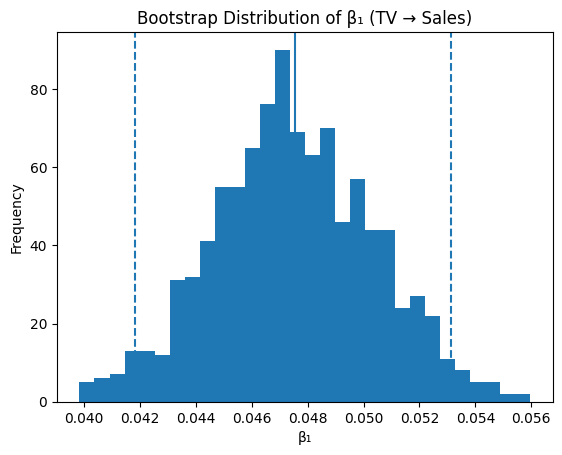


Analytical 95% CI: (0.042230716032698824, 0.052842564833340704)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# 1️. Load dataset
data = pd.read_csv("Advertising Budget and Sales.csv")

# 2️. Feature and Target
X = data[['TV Ad Budget ($)']]
y = data['Sales ($)']

# 3️. Fit Linear Regression (sklearn)
model = LinearRegression()
model.fit(X, y)

beta_original = model.coef_[0]
print("Original β₁ (Slope):", beta_original)

# 4️. Bootstrap
B = 1000
n = len(data)
boot_betas = []

for i in range(B):
    indices = np.random.choice(n, n, replace=True)
    X_sample = X.iloc[indices]
    y_sample = y.iloc[indices]

    model_boot = LinearRegression()
    model_boot.fit(X_sample, y_sample)

    boot_betas.append(model_boot.coef_[0])

boot_betas = np.array(boot_betas)

# Bootstrap statistics
mean_boot = np.mean(boot_betas)
std_boot = np.std(boot_betas, ddof=1)
lower = np.percentile(boot_betas, 2.5)
upper = np.percentile(boot_betas, 97.5)

print("\nBootstrap Results:")
print("Mean of β₁:", mean_boot)
print("Std Dev of β₁:", std_boot)
print("95% CI:", (lower, upper))

# 5️. Plot Bootstrap Distribution
plt.hist(boot_betas, bins=30)
plt.axvline(lower, linestyle='--')
plt.axvline(upper, linestyle='--')
plt.axvline(beta_original)
plt.title("Bootstrap Distribution of β₁ (TV → Sales)")
plt.xlabel("β₁")
plt.ylabel("Frequency")
plt.show()

# 6️. Analytical CI using statsmodels
X_sm = sm.add_constant(X)
model_sm = sm.OLS(y, X_sm).fit()

analy_ci = model_sm.conf_int().loc['TV Ad Budget ($)']
print("\nAnalytical 95% CI:", tuple(analy_ci))

**SUBTASK-04**

Bootstrap Application: Applying Bootstrap method to estimate confidence
intervals for a model parameter -e.g., regression coefficient

Kaggle Dataset Link: https://www.kaggle.com/datasets/hellbuoy/car-price-prediction?

Tasks:
1. Load dataset and choose:
Feature: horsepower
Target: price
2. Train Linear Regression and obtain coefficient for horsepower.
3. Use bootstrap resampling (B=1500) to estimate 95% CI.
4. Report CI and explain the impact of horsepower on price.
5. Plot histogram + mark CI bounds

Original Coefficient (β_horsepower): 163.26306096964797

95% Confidence Interval for horsepower coefficient:
Lower Bound: 140.34532004748556
Upper Bound: 191.27812534672194


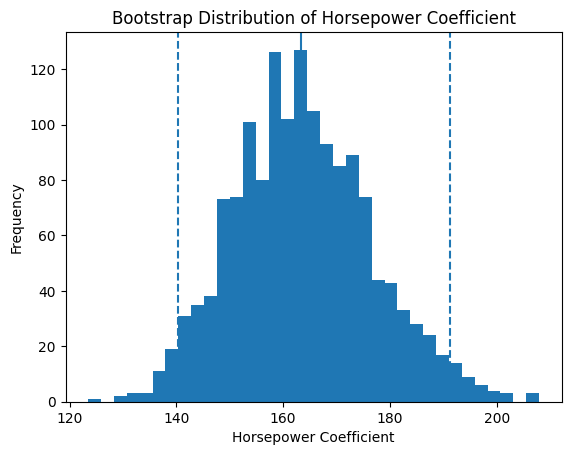

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1️.Load dataset
data = pd.read_csv("CarPrice_Assignment.csv")

# Keep only required columns and drop missing values
data = data[['horsepower', 'price']].dropna()

X = data[['horsepower']]
y = data['price']

# 2.Train Linear Regression
model = LinearRegression()
model.fit(X, y)

beta_original = model.coef_[0]
print("Original Coefficient (β_horsepower):", beta_original)

# 3️. Bootstrap (B = 1500)
B = 1500
n = len(data)
boot_betas = []

for i in range(B):
    indices = np.random.choice(n, n, replace=True)
    X_sample = X.iloc[indices]
    y_sample = y.iloc[indices]

    model_boot = LinearRegression()
    model_boot.fit(X_sample, y_sample)

    boot_betas.append(model_boot.coef_[0])

boot_betas = np.array(boot_betas)

# 4️. 95% Confidence Interval (Percentile Method)
lower = np.percentile(boot_betas, 2.5)
upper = np.percentile(boot_betas, 97.5)

print("\n95% Confidence Interval for horsepower coefficient:")
print("Lower Bound:", lower)
print("Upper Bound:", upper)

# 5️. Plot histogram
plt.hist(boot_betas, bins=35)
plt.axvline(lower, linestyle='--')
plt.axvline(upper, linestyle='--')
plt.axvline(beta_original)
plt.title("Bootstrap Distribution of Horsepower Coefficient")
plt.xlabel("Horsepower Coefficient")
plt.ylabel("Frequency")
plt.show()

**SUBTASK-05**

Bootstrap Application: Applying Bootstrap method to estimate confidence
intervals for a model parameter -e.g., regression coefficient.

Kaggle Dataset Link:
https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles

Tasks:
1. Load dataset and use:
Feature: Engine Size
Target: CO2 Emissions
2. Fit Linear Regression and extract coefficient β₁.
3. Perform Bootstrap (B=2000) to estimate:
90% CI and 95% CI for β₁
4. Compare both confidence intervals.
5. Conclude whether engine size significantly affects CO₂ emissions.


Original Coefficient (β₁ - Engine Size): 36.77731518641943

90% Confidence Interval: (np.float64(36.23002596597676), np.float64(37.3010256876701))
95% Confidence Interval: (np.float64(36.12249118863395), np.float64(37.3839149890151))


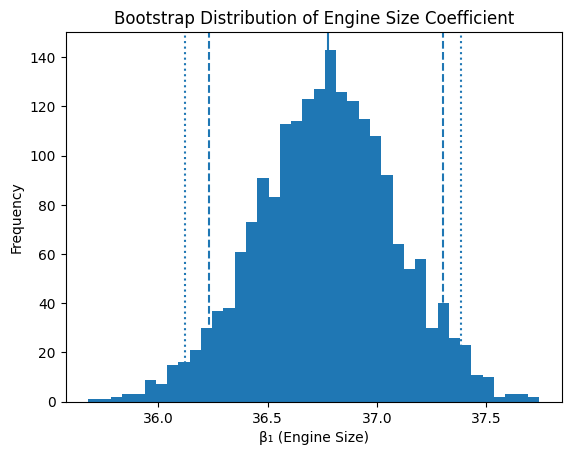

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1️. Load dataset
data = pd.read_csv("CO2 Emissions_Canada.csv")

# Keep only required columns and drop missing values
data = data[['Engine Size(L)', 'CO2 Emissions(g/km)']].dropna()

# Rename for convenience (optional)
data.columns = ['EngineSize', 'CO2']

X = data[['EngineSize']]
y = data['CO2']

# 2️. Fit Linear Regression
model = LinearRegression()
model.fit(X, y)

beta_original = model.coef_[0]
print("Original Coefficient (β₁ - Engine Size):", beta_original)

# 3️.Bootstrap (B = 2000)
B = 2000
n = len(data)
boot_betas = []

for i in range(B):
    indices = np.random.choice(n, n, replace=True)
    X_sample = X.iloc[indices]
    y_sample = y.iloc[indices]

    model_boot = LinearRegression()
    model_boot.fit(X_sample, y_sample)

    boot_betas.append(model_boot.coef_[0])

boot_betas = np.array(boot_betas)

# 4️. Confidence Intervals
# 90% CI
lower_90 = np.percentile(boot_betas, 5)
upper_90 = np.percentile(boot_betas, 95)

# 95% CI
lower_95 = np.percentile(boot_betas, 2.5)
upper_95 = np.percentile(boot_betas, 97.5)

print("\n90% Confidence Interval:", (lower_90, upper_90))
print("95% Confidence Interval:", (lower_95, upper_95))

# Plot Bootstrap Distribution
plt.hist(boot_betas, bins=40)
plt.axvline(lower_90, linestyle='--')
plt.axvline(upper_90, linestyle='--')
plt.axvline(lower_95, linestyle=':')
plt.axvline(upper_95, linestyle=':')
plt.axvline(beta_original)
plt.title("Bootstrap Distribution of Engine Size Coefficient")
plt.xlabel("β₁ (Engine Size)")
plt.ylabel("Frequency")
plt.show()